In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# UniCat dispersion rate

The dispersion rate is calculated as follows:

The library count is divided by the total number of libraries.

#### Import data

In [3]:
con = sqlite3.connect("unicat_holdings.db")

In [4]:
libraries = pd.read_sql(""" SELECT library, type FROM libraries""", 
                        con)

In [13]:
# the total number of libraries an be set to len(libraries) or to 90 (because that is the total number of possible libraries)
# not all libraries hold books from VABB
total_libraries = 90

In [24]:
df = pd.read_sql(
    """
    SELECT library_count, work_id
    FROM (
        SELECT work_id, COUNT(DISTINCT location) library_count
        FROM holding
        GROUP BY work_id
    )
    """,
    con,
)

In [25]:
df.shape

(25524, 2)

In [26]:
df.head(2)

,library_count,work_id
0,10,7
1,14,11


#### Calculate dispersion rate

In [27]:
dispersion = df.copy()

In [28]:
dispersion["dispersion_rate"] = df.library_count.apply(lambda x: (x/total_libraries)*100)

#### Look at dispersion rate

In [29]:
dispersion.dispersion_rate.describe()

count    25524.000000
mean         6.503596
std          5.112859
min          1.111111
25%          2.222222
50%          4.444444
75%         10.000000
max         38.888889
Name: dispersion_rate, dtype: float64

<AxesSubplot:xlabel='dispersion_rate', ylabel='work_id'>

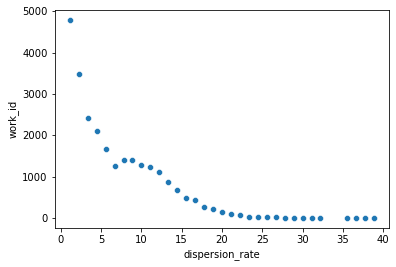

In [30]:
fig, ax = plt.subplots()

data = pd.DataFrame(dispersion.groupby("dispersion_rate").work_id.count()).reset_index()

sns.scatterplot(data = data, x="dispersion_rate",y="work_id", ax=ax)



[None, None]

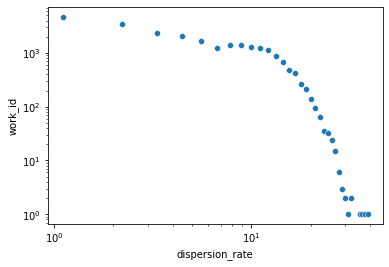

In [31]:
fig, ax = plt.subplots()

data = pd.DataFrame(dispersion.groupby("dispersion_rate").work_id.count()).reset_index()

sns.scatterplot(data = data, x="dispersion_rate",y="work_id", ax=ax)

ax.set(xscale="log",yscale="log")

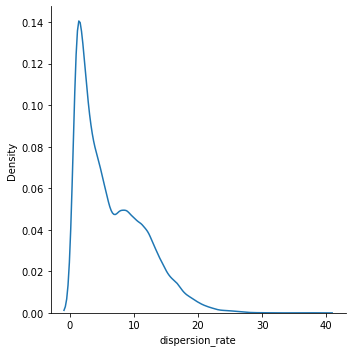

In [33]:
sns.displot(data = dispersion.dispersion_rate, kind = "kde")

# Cultuurconnect dispersion rate

The Culotuurconnect dispersion rate can be calculated with the total number of libraries or with the libraries in our dataset

#### Import data

In [47]:
con = sqlite3.connect("cultuurconnect.db")

In [48]:
holding = pd.read_sql("""SELECT w.work_id, COUNT(distinct library) library_count
                        FROM holding h
                        JOIN works_frabl w ON h.frabl = w.frabl
                        GROUP BY work_id
                        """, con)

In [49]:
holding

,work_id,library_count
0,1,9
1,2,4
2,4,4
3,6,71
4,7,4
...,...,...
8040,8701,2
8041,8702,1
8042,8703,1
8043,8705,1


#### The number of libraries in total

In [50]:
total_libraries = 854

#### Calculate the dispersion rate

In [51]:
dispersion = holding.copy()
dispersion["dispersion_rate"] = dispersion.library_count.apply(lambda x: (x/total_libraries)*100)

#### Take a look at the dispersion rate

In [53]:
dispersion

,work_id,library_count,dispersion_rate
0,1,9,1.053864
1,2,4,0.468384
2,4,4,0.468384
3,6,71,8.313817
4,7,4,0.468384
...,...,...,...
8040,8701,2,0.234192
8041,8702,1,0.117096
8042,8703,1,0.117096
8043,8705,1,0.117096


In [54]:
dispersion.dispersion_rate.describe()

count    8045.000000
mean        1.832840
std         3.859114
min         0.117096
25%         0.117096
50%         0.468384
75%         1.522248
max        49.882904
Name: dispersion_rate, dtype: float64

<AxesSubplot:xlabel='dispersion_rate', ylabel='Count'>

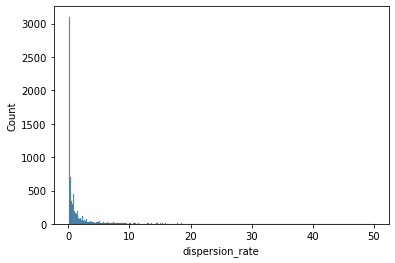

In [55]:
fig, ax = plt.subplots()

sns.histplot(data = dispersion.dispersion_rate, ax=ax)

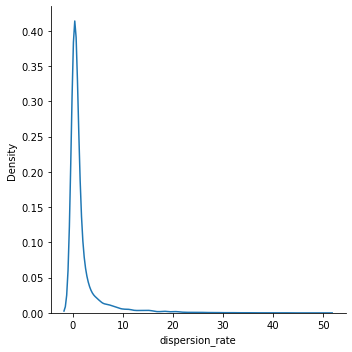

In [113]:
sns.displot(data = dispersion.dispersion_rate, kind = "kde")

In [127]:
dispersion[dispersion.dispersion_rate == dispersion.dispersion_rate.max()].index

Int64Index([6755], dtype='int64', name='work_id')

In [129]:
frabls = pd.read_sql("""SELECT work_id,frabl FROM works_frabl""", con)

In [132]:
max_disp = frabls[frabls.work_id == 6755].frabl
max_disp

6797    236C6FEAE0F0A0A0
Name: frabl, dtype: object

In [134]:
metadata = pd.read_sql("""SELECT frabl,title,year,main_author,type FROM metadata""", con)

In [143]:
metadata[metadata.frabl == "236C6FEAE0F0A0A0"].title.values

array(['De canon : de 50+1 mooiste literaire werken uit de Nederlanden / geselecteerd door KANTL en Vlaams Fonds voor de Letteren ; met bijdragen van Elke Brems, Hugo Brems, Geert Buelens ... [et al.]'],
      dtype=object)